<a href="https://colab.research.google.com/github/shonam305/madhu01/blob/main/Forestcover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.335809050999998
GPU (s):
0.13535826400000417
GPU speedup over CPU: 46x


In [3]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from google.colab import files
uploaded = files.upload()

Saving covtype.csv to covtype.csv


# New Section

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['covtype.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [10]:
def outlier_function(df,col_name):

    Q1 = np.percentile(np.array(df[col_name].tolist()), 25)
    Q3 = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = Q3-Q1
                      
    upper_limit = Q3+(3*IQR)
    lower_limit = Q1-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [11]:
for column in df.columns:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points
There are 29884 outliers in Wilderness_Area2
There are 36968 outliers in Wilderness_Area4
There are 3031 outliers in Soil_Type1
There are 7525 outliers in Soil_Type2
There are 4823 outliers in Soil_Type3
There are 12396 outliers in Soil_Type4
There are 1597 outliers in Soil_Type5
There are 6575 outliers in Soil_Type6
There are 105 outliers in Soil_Type7
There are 179 outliers in Soil_Type8
There are 1147 outliers in Soil_Type9
There are 32634 outliers in Soil_Type10
There are 12410 outliers in Soil_Type11
There are 29971 outliers in Soil_Type12
There are 17431 outliers in Soil_Type13
There are 599 outliers in Soil_Type14
There are 3 outliers in Soil_Type15
There are 2845 outliers in Soil_Type16
Ther

In [12]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] > outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[1])]
df.shape

(581002, 55)

In [13]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in df.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(df[is_binary_columns].values.ravel())

array([1, 0])

In [14]:
# sum of all widerness area columns
df["w_sum"] = df["Wilderness_Area1"] + df["Wilderness_Area2"] + df["Wilderness_Area3"] + df["Wilderness_Area4"]
print(df.w_sum.value_counts())

1    581002
Name: w_sum, dtype: int64


In [15]:
# create a list of soil_type columns
soil_columns = [c for c in df.columns if "Soil" in c]
df["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    df["soil_sum"] += df[c]

print(df.soil_sum.value_counts())

1    581002
Name: soil_sum, dtype: int64


In [16]:
df.drop(columns=["w_sum", "soil_sum"], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


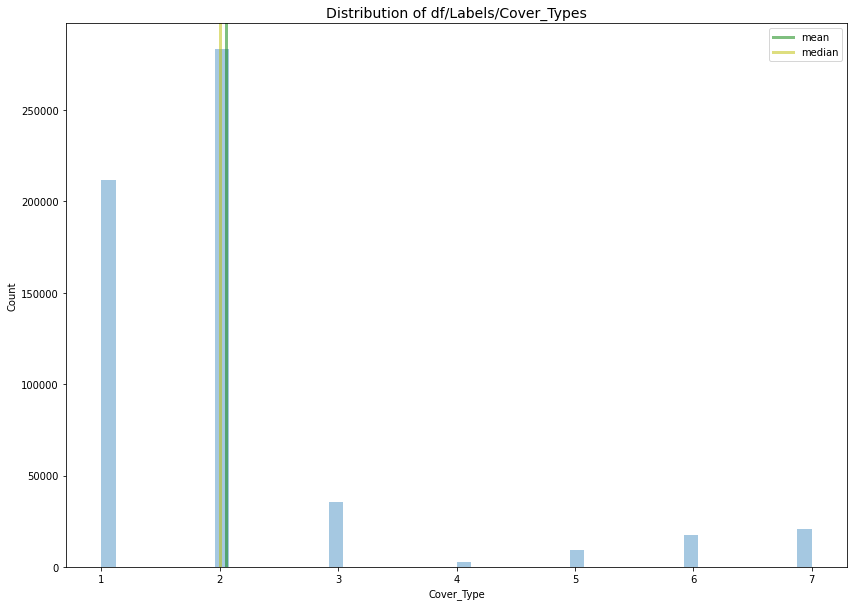

In [17]:
# set the plot size
figsize(14,10)

# set the histogram, mean and median
sns.distplot(df["Cover_Type"], kde=False)
plt.axvline(x=df.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of df/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

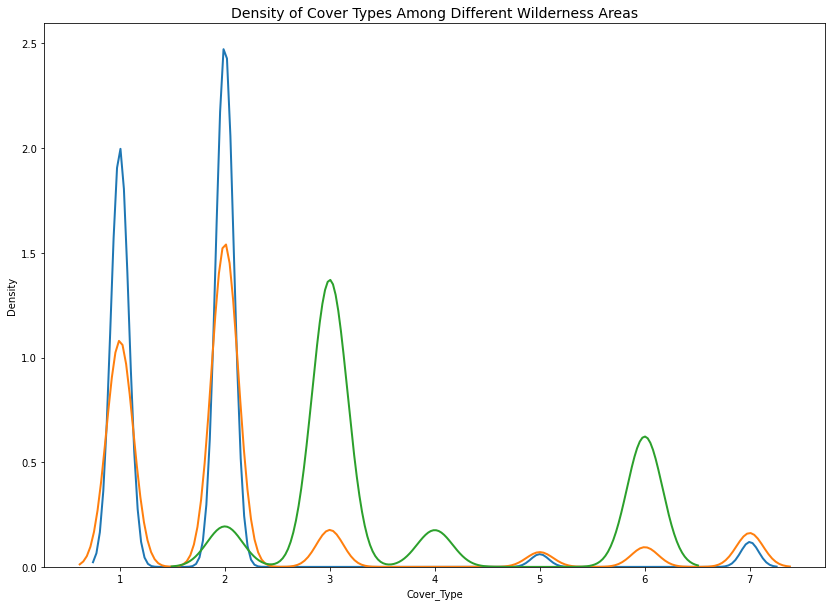

In [18]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
df['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = df[df['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

In [18]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [19]:
reverse_one_hot_encode(df, 16, 56, "Soil_Type")

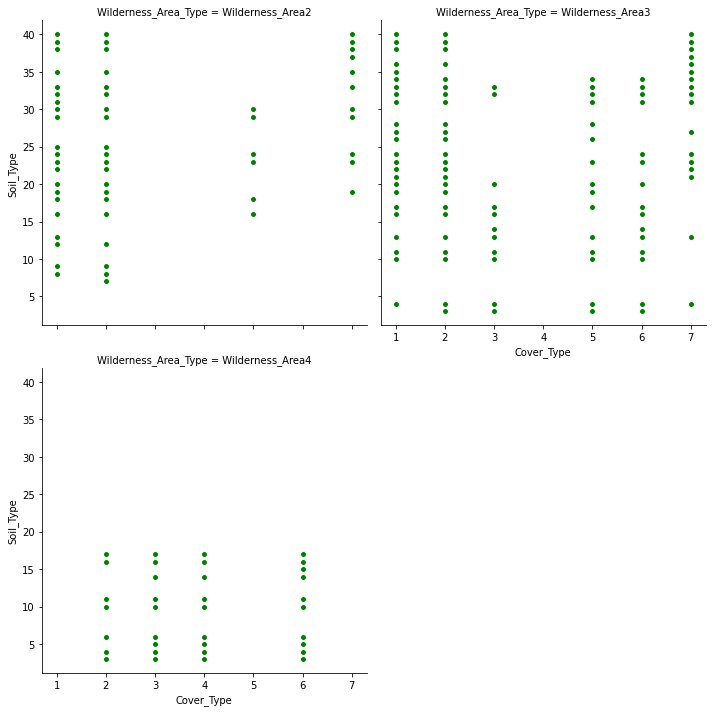

In [20]:
g = sns.FacetGrid(df, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")

In [21]:
# store continious variables in a list
continuous_variables = df.columns[1:11].tolist()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

In [22]:
# Create the pairgrid object
grid = sns.PairGrid(data = df[continuous_variables])

# Upper is a correlation and kdeplot
grid.map_upper(corr_func);
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)

Error in callback <function flush_figures at 0x7f000de8b200> (for post_execute):


KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Elevation VS Slope')

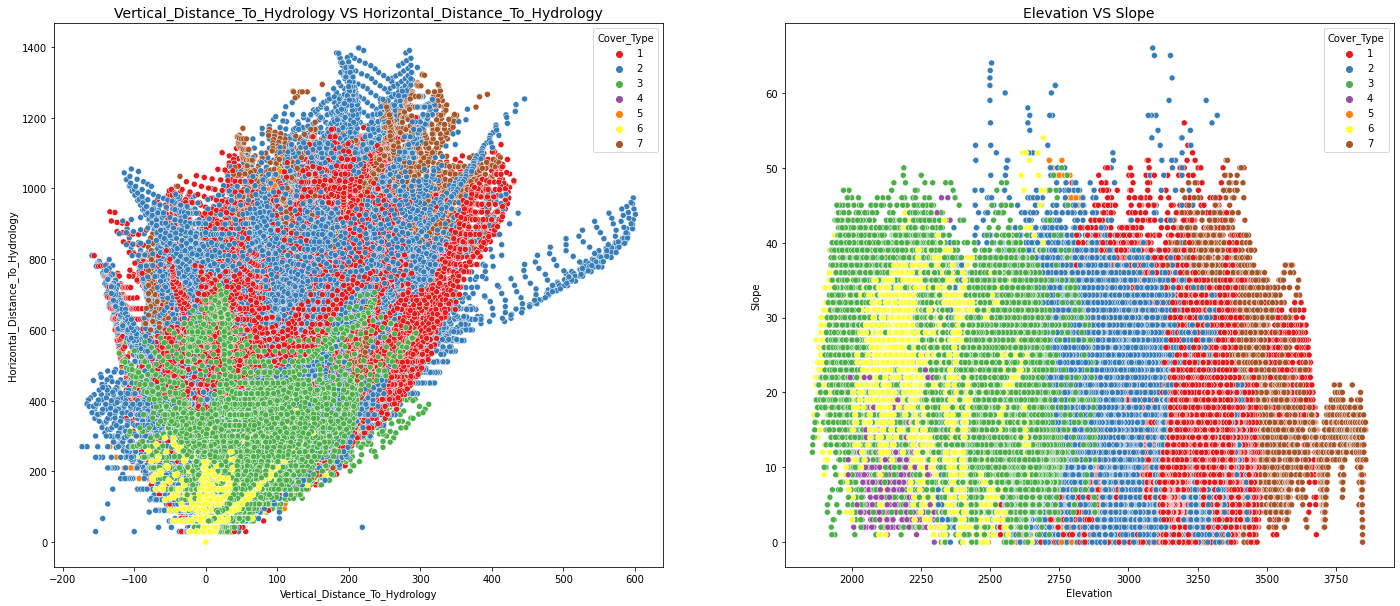

In [23]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

Text(0.5, 1.05, 'Pearson Correlation of All Features')

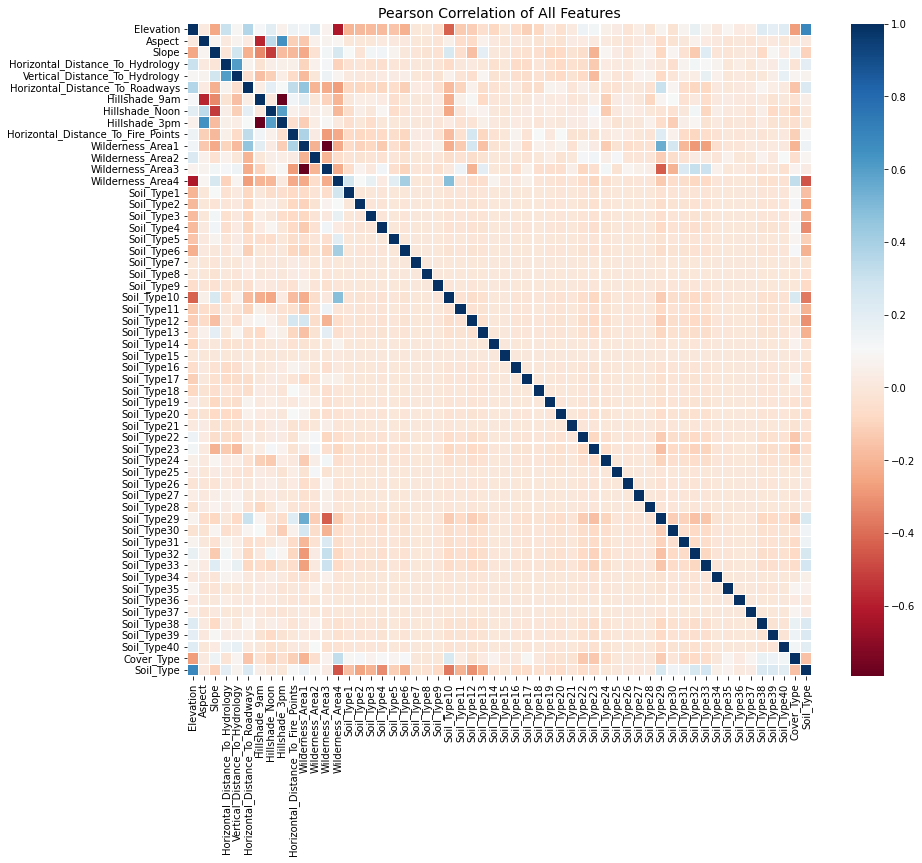

In [24]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

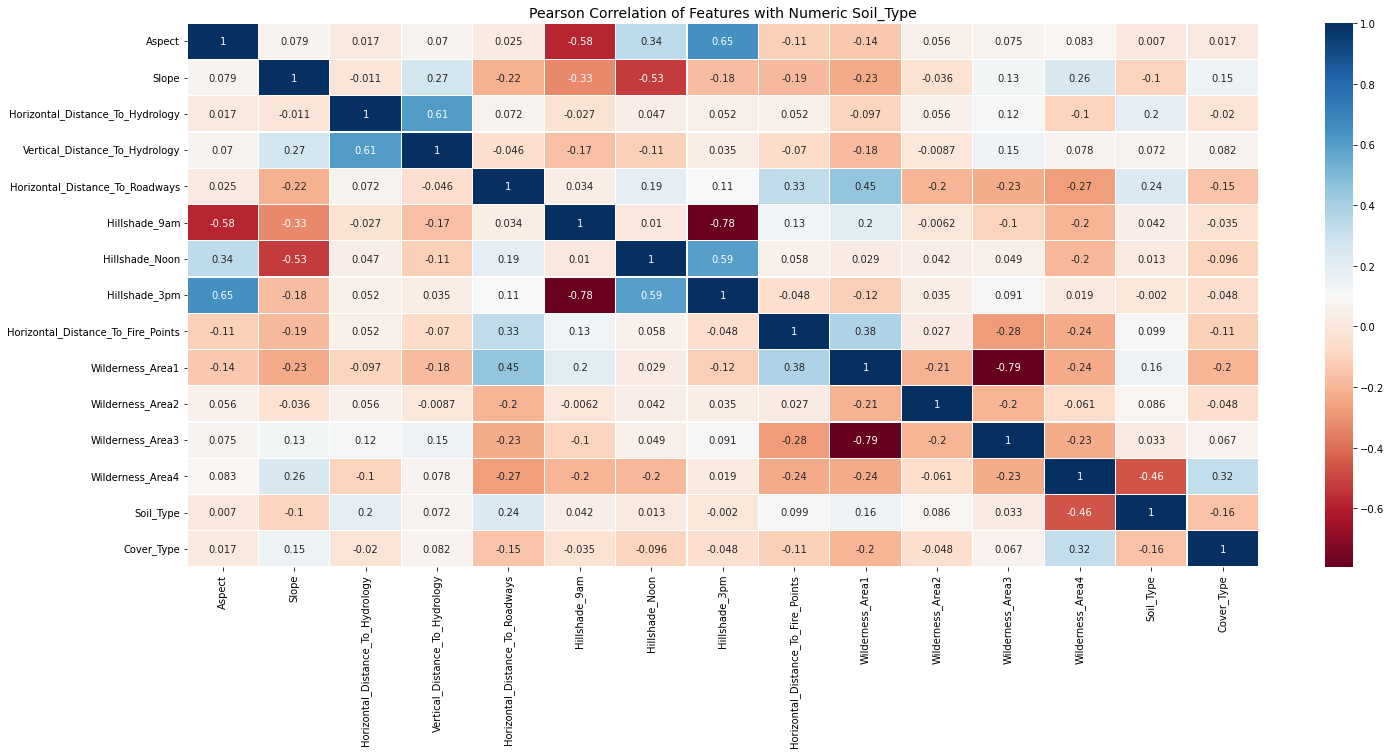

In [25]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
df_w_numeric_soil = df[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(df_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

In [27]:
correlations_transformed = pd.DataFrame(df_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
9,Wilderness_Area1,-0.203915
13,Soil_Type,-0.162485
4,Horizontal_Distance_To_Roadways,-0.153450
8,Horizontal_Distance_To_Fire_Points,-0.108947
6,Hillshade_Noon,-0.096433
7,Hillshade_3pm,-0.048290
10,Wilderness_Area2,-0.048059
5,Hillshade_9am,-0.035416
2,Horizontal_Distance_To_Hydrology,-0.020318
0,Aspect,0.017080


In [28]:
df_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 +  
                                                           df_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5

In [29]:
print(df.columns.tolist())

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type', 'Wilderness_Area_Type', 'Soil_Type']


In [33]:
# add columns
df_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           df_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
df_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (df_w_numeric_soil['Elevation'] + 
                                                                      df_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
df_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
df_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
df_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

KeyError: ignored

In [31]:
# add columns
df_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           df_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
df_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (df_w_numeric_soil['Elevation'] + 
                                                                    df_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
df_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
df_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
df_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

KeyError: ignored

In [34]:
for col in df_w_numeric_soil.columns:
    if df_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
           df_w_numeric_soil['sqrt' + col] = np.sqrt(df_w_numeric_soil[col])

In [35]:
correlations_transformed = pd.DataFrame(df_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
31,sqrtSoil_Type,-0.208172
9,Wilderness_Area1,-0.203915
27,sqrtWilderness_Area1,-0.203915
35,sqrtMean_Distance_Firepoints_Roadways,-0.185199
34,sqrtMean_Distance_Hydrology_Roadways,-0.164885
18,Mean_Distance_Firepoints_Roadways,-0.162741
13,Soil_Type,-0.162485
22,sqrtHorizontal_Distance_To_Roadways,-0.161923
4,Horizontal_Distance_To_Roadways,-0.153450
17,Mean_Distance_Hydrology_Roadways,-0.153317


In [36]:
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                         'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  ([ 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_9am','Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)

In [37]:
print(df.columns.tolist())

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type', 'Wilderness_Area_Type', 'Soil_Type']


In [38]:
df_training = df_w_numeric_soil[all_features]
labels_training = df_w_numeric_soil["Cover_Type"].values

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(df_training, labels_training, test_size=0.2, random_state=1)

In [40]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (464801, 17)
Validation Data Shape: (116201, 17)


In [41]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (464801,)
Validation Label Shape: (116201,)


In [5]:
# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

NameError: ignored

In [43]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

In [44]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [46]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [48]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [49]:
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

Number of correct predictions made out of all predictions are: 0.7811980964019243


In [50]:
# create model apply fit_evaluate_model
rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.9592258242183802


In [51]:
# create model apply fit_evaluate_model
xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xrf_accuracy)

Number of correct predictions made out of all predictions are: 0.9621173655992633


In [52]:
# create model apply fit_evaluate_model
xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.6894605037822394


Text(0.5, 1.0, 'Accuracy Score of Different Models')

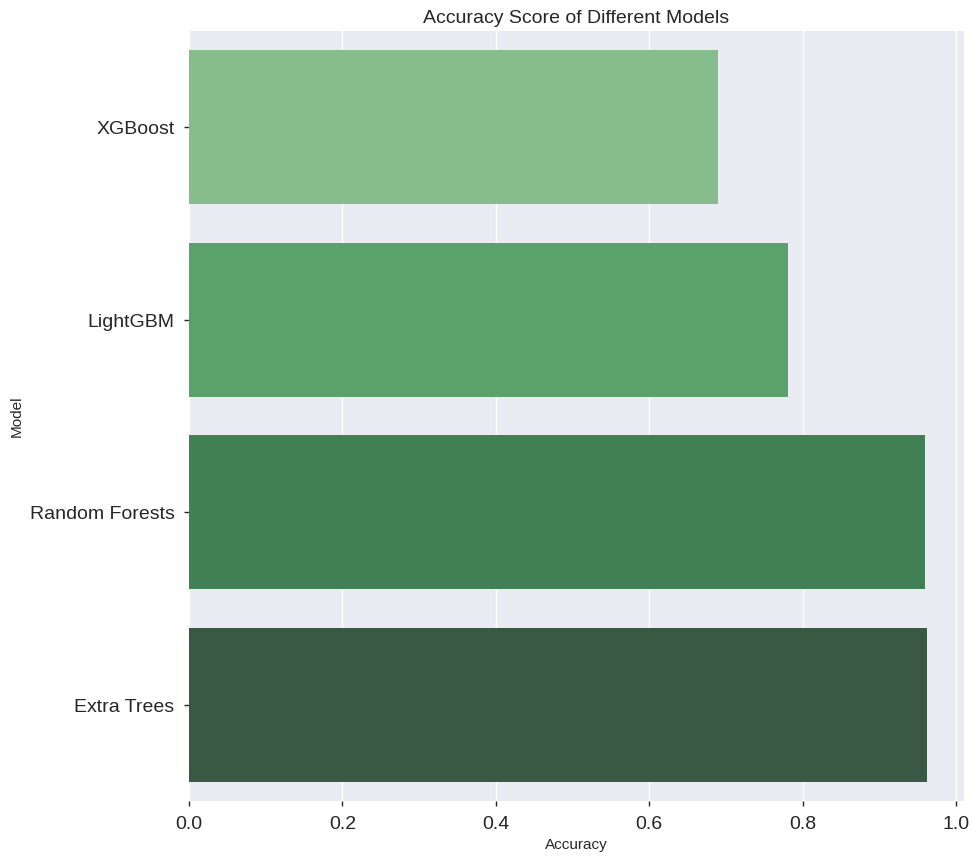

In [58]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["LightGBM", "Random Forests", "Extra Trees", "XGBoost"],
                                       "Accuracy": [ lgbm_accuracy, rf_accuracy, xrf_accuracy, xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

In [3]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [4]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

NameError: ignored

In [2]:
# Fit on the all training data using random search object
random_cv.fit(df_training, labels_training)

NameError: ignored

In [1]:
random_cv.best_estimator_

NameError: ignored

In [ ]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=300, 
                                                     max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)

xrf_accuracy_opt_w_rand_search = fit_evaluate_model(xrf_classifier_w_random_search, X_train, y_train, X_valid, y_valid)

In [ ]:
print("Accuracy score in the previous extra random forests model:", xrf_accuracy)
print("Accuracy score after hyperparameter tuning:", xrf_accuracy_opt_w_rand_search)

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [300, 500, 700, 900, 1200, 1500]}

# define all parameters except n_estimators
xrf_classifier_w_grid_search = ExtraTreesClassifier(max_features=None, 
                                                    min_samples_leaf=1, 
                                                    min_samples_split=2,
                                                    random_state=42)

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = xrf_classifier_w_grid_search, param_grid=trees_grid, 
                           cv = 5, scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# fit the dataset to grid search object
grid_search.fit(trees_training, labels_training)

In [ ]:
# Get the results into a dataframe
xrf_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

In [ ]:
xrf_results[["param_n_estimators", "params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

In [ ]:
xrf_optimal_model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           random_state=42)

xrf_optimal_model_accuracy = fit_evaluate_model(xrf_optimal_model, X_train, y_train, X_valid, y_valid)

In [ ]:
print("Accuracy score with random forests model when n_estimators=300:", xrf_accuracy_opt_w_rand_search)
print("Accuracy score with random forests model when n_estimators=500:", xrf_optimal_model_accuracy)

In [ ]:
# create set of y_predictions
y_predicted = xrf_optimal_model.predict(X_valid)

In [ ]:
# make a list of cover_types
cover_types = sorted(trees['Cover_Type'].value_counts().index.tolist())

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
trees_test = pd.read_csv("/kaggle/input/learn-together/test.csv")